## Practice: Attention Basics
Original notebook is provided by Udacity at [github](https://github.com/udacity/deep-learning-v2-pytorch/blob/master/attention/Attention_Basics.ipynb).

In this notebook, we look at how attention is implemented. We will focus on implementing attention in isolation from a larger model. That's because when implementing attention in a real-world model, a lot of the focus goes into piping the data and juggling the various vectors rather than the concepts of attention themselves.

We will implement attention scoring as well as calculating an attention context vector.

## Attention Scoring
### Inputs to the scoring function
Let's start by looking at the inputs we'll give to the scoring function. We will assume we're in the first step in the decoding phase. The first input to the scoring function is the hidden state of decoder (assuming a toy RNN with three hidden nodes -- not usable in real life, but easier to illustrate):

In [1]:
dec_hidden_state = [5,1,20]

Let's visualize this vector:

<AxesSubplot:>

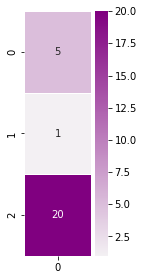

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Let's visualize our decoder hidden state
plt.figure(figsize=(1.5, 4.5))
sns.heatmap(
    np.transpose(np.matrix(dec_hidden_state)),
            annot=True,
            cmap=sns.light_palette("purple", as_cmap=True), linewidths=1)

Our first scoring function will score a single annotation (encoder hidden state), which looks like this:

In [3]:
annotation = [3,12,45] #e.g. Encoder hidden state

<AxesSubplot:>

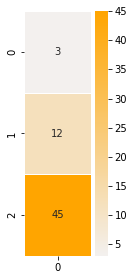

In [4]:
# Let's visualize the single annotation
plt.figure(figsize=(1.5, 4.5))
sns.heatmap(np.transpose(np.matrix(annotation)), annot=True, cmap=sns.light_palette("orange", as_cmap=True), linewidths=1)

### IMPLEMENT: Scoring a Single Annotation
Let's calculate the dot product of a single annotation. NumPy's [dot()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html) is a good candidate for this operation

In [5]:
def single_dot_attention_score(dec_hidden_state, enc_hidden_state):
    # TODO: return the dot product of the two vectors
    return np.dot(dec_hidden_state, enc_hidden_state)
    
single_dot_attention_score(dec_hidden_state, annotation)

927


### Annotations Matrix
Let's now look at scoring all the annotations at once. To do that, here's our annotation matrix:

In [6]:
annotations = np.transpose(
    [[3,12,45], [59,2,5], [1,43,5], [4,3,45.3]])

And it can be visualized like this (each column is a hidden state of an encoder time step):

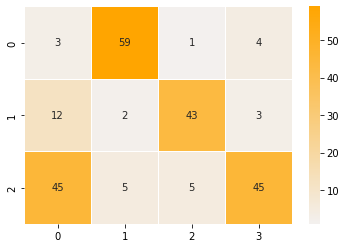

In [7]:
# Let's visualize our annotation (each column is an annotation)
ax = sns.heatmap(
    annotations,
    annot=True,
    cmap=sns.light_palette("orange", as_cmap=True), linewidths=1)

### IMPLEMENT: Scoring All Annotations at Once
Let's calculate the scores of all the annotations in one step using matrix multiplication. Let's continue to us the dot scoring method

<img src="img/scoring_functions.png" />

To do that, we'll have to transpose `dec_hidden_state` and [matrix multiply](https://docs.scipy.org/doc/numpy/reference/generated/numpy.matmul.html) it with `annotations`.

In [8]:
def dot_attention_score(dec_hidden_state, annotations):
    # TODO: return the product of dec_hidden_state transpose and enc_hidden_states
    return np.transpose(dec_hidden_state) @ annotations
    
attention_weights_raw = dot_attention_score(dec_hidden_state, annotations)
attention_weights_raw

array([927., 397., 148., 929.])

Looking at these scores, can you guess which of the four vectors will get the most attention from the decoder at this time step?

## Softmax
Now that we have our scores, let's apply softmax:
<img src="img/softmax.png" />

In [9]:
def softmax(x):
    x = np.array(x, dtype=np.float128)
    e_x = np.exp(x)
    return e_x / e_x.sum(axis=0) 

attention_weights = softmax(attention_weights_raw)
attention_weights

array([1.19202922e-001, 7.94715151e-232, 5.76614420e-340, 8.80797078e-001],
      dtype=float128)

Even when knowing which annotation will get the most focus, it's interesting to see how drastic softmax makes the end score become. The first and last annotation had the respective scores of 927 and 929. But after softmax, the attention they'll get is 0.12 and 0.88 respectively.

# Applying the scores back on the annotations
Now that we have our scores, let's multiply each annotation by its score to proceed closer to the attention context vector. This is the multiplication part of this formula (we'll tackle the summation part in the latter cells)

<img src="img/Context_vector.png" />

In [10]:
def apply_attention_scores(attention_weights, annotations):
    # TODO: Multiple the annotations by their weights
    return attention_weights * annotations

applied_attention = apply_attention_scores(attention_weights, annotations)
applied_attention

array([[3.57608766e-001, 4.68881939e-230, 5.76614420e-340,
        3.52318831e+000],
       [1.43043506e+000, 1.58943030e-231, 2.47944200e-338,
        2.64239123e+000],
       [5.36413149e+000, 3.97357575e-231, 2.88307210e-339,
        3.99001076e+001]], dtype=float128)

Let's visualize how the context vector looks now that we've applied the attention scores back on it:

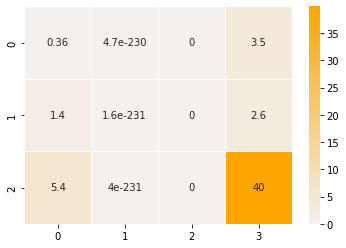

In [11]:
# Let's visualize our annotations after applying attention to them
ax = sns.heatmap(applied_attention, annot=True, cmap=sns.light_palette("orange", as_cmap=True), linewidths=1)

Contrast this with the raw annotations visualized earlier in the notebook, and we can see that the second and third annotations (columns) have been nearly wiped out. The first annotation maintains some of its value, and the fourth annotation is the most pronounced.

# Calculating the Attention Context Vector
All that remains to produce our attention context vector now is to sum up the four columns to produce a single attention context vector


In [12]:
def calculate_attention_vector(applied_attention):
    return np.sum(applied_attention, axis=1)

attention_vector = calculate_attention_vector(applied_attention)
attention_vector

array([ 3.88079708,  4.0728263 , 45.26423912], dtype=float128)

<AxesSubplot:>

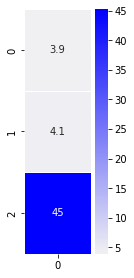

In [13]:
# Let's visualize the attention context vector
plt.figure(figsize=(1.5, 4.5))
sns.heatmap(np.transpose(np.matrix(attention_vector)), annot=True, cmap=sns.light_palette("Blue", as_cmap=True), linewidths=1)

Now that we have the context vector, we can concatenate it with the hidden state and pass it through a hidden layer to produce the the result of this decoding time step.

### Your turn:
Now implement the _general_ and _concat_ attention scores and check it below.

In [15]:
# Yeah, you need to initialize the matrix first (just use random, the main idea is the dimentionality)
Wa = np.random.rand(3,3)# <YOUR CODE HERE> 
def general_attention_score(dec_hidden_state, annotations, Wa):
    # TODO: return the product of dec_hidden_state transpose and enc_hidden_states
    return np.transpose(dec_hidden_state) @ Wa @ annotations
    
attention_weights_raw = general_attention_score(dec_hidden_state, annotations, Wa)
print(attention_weights_raw.shape)
attention_weights_raw

(4,)


array([ 738.25484491, 1059.49746604,  315.64195851,  710.94790752])

<AxesSubplot:>

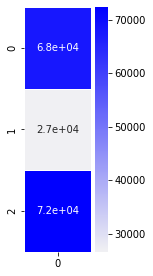

In [16]:
# Some post-processing like above
general_attention_vector = np.sum(
    attention_weights_raw * annotations,
    axis= 1)

# Let's visualize the attention context vector
plt.figure(figsize=(1.5, 4.5))
sns.heatmap(np.transpose(
    np.matrix(general_attention_vector)),
            annot=True,
            cmap=sns.light_palette("Blue", as_cmap=True),
            linewidths=1)

In [ ]:
# And here you need to initialize both the vector v and the matrix Wa (
# (again, random is fine)

Wa = # <YOUR CODE HERE> 
va = # <YOUR CODE HERE> 
def concat_attention_score(dec_hidden_state, annotations, Wa, va):
    # TODO: return the product of dec_hidden_state transpose and enc_hidden_states
    return 
    
attention_weights_raw = concat_attention_score(dec_hidden_state, annotations, Wa, va)
attention_weights_raw

In [ ]:
# And again some post-processing

## Part 2: Google Colab intro
We roll back to the week03 practice: name generation.

In [29]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [30]:
from IPython.display import clear_output
from random import sample

In [31]:
start_token = " "

def read_names(path_to_file):
    global start_token
    
    with open(path_to_file) as f:
        names = f.read()[:-1].split('\n')
        names = [start_token + line for line in names]
        return names

In [32]:
try:
    names = read_names('../datasets/names_dataset/names')
except FileNotFoundError:
    !wget https://raw.githubusercontent.com/neychev/made_nlp_course/master/datasets/names_dataset/names -nc -O names
    names = read_names('./names')
    
try:
    names_ru = read_names('../datasets/names_dataset/names_ru')
except FileNotFoundError:
    !wget https://raw.githubusercontent.com/neychev/made_nlp_course/master/datasets/names_dataset/names_ru -nc -O names_ru
    names_ru = read_names('./names_ru')

File ‘names’ already there; not retrieving.
File ‘names_ru’ already there; not retrieving.


In [33]:
print ('n samples = ',len(names_ru))
for idx in np.arange(0, len(names), 1000):
    print(names[idx], names_ru[idx])

assert len(names) == len(names_ru), 'Wrong lengths'

n samples =  7944
 Abagael  Абагаел
 Claresta  Слареста
 Glory  Глорй
 Liliane  Лилиане
 Prissie  Приссие
 Geeta  Геета
 Giovanne  Гиованне
 Piggy  Пиггй


In [34]:
# Note: check number of names which lengths do not match:
s=0
for i,j in zip(names, names_ru):
    if len(i) != len(j): 
        if s == 0: 
            print(f'First sample:{i} - {j}')
        s+=1
print(s)

First sample: Alex -  Алекс
402


max length = 16


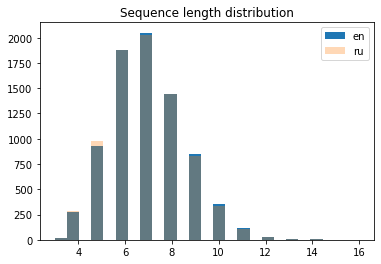

In [35]:
MAX_LENGTH = max(map(len, names))
print("max length =", MAX_LENGTH)

plt.title('Sequence length distribution')
plt.hist(list(map(len, names)),bins=25, label='en');

plt.title('Sequence length distribution')
plt.hist(list(map(len, names_ru)),bins=25, alpha=0.3, label='ru');
plt.legend()
plt.show()

In [36]:
all_tokens_set_en = set()
for name in names:
    all_tokens_set_en.update(set(name))

tokens_en = list(all_tokens_set_en)# <list of all unique characters in the dataset>

num_tokens_en = len(tokens_en)
print (f'num_tokens = {num_tokens_en}')

assert 50 < num_tokens_en < 60, "Names should contain within 50 and 60 unique tokens depending on encoding"

num_tokens = 55


In [37]:
all_tokens_set_ru = set()
for name in names_ru:
    all_tokens_set_ru.update(set(name))

tokens_ru = list(all_tokens_set_ru)# <list of all unique characters in the dataset>

num_tokens_ru = len(tokens_ru)
print (f'num_tokens = {num_tokens_ru}')

assert 50 < num_tokens_ru < 60, "Names should contain within 50 and 60 unique tokens depending on encoding"

num_tokens = 54


In [38]:
token_to_id_en = {
    token: idx for idx, token in enumerate(tokens_en)
}

token_to_id_ru = {
    token: idx for idx, token in enumerate(tokens_ru)
}

In [39]:
assert len(tokens_ru) == len(token_to_id_ru), "dictionaries must have same size"

for i in range(num_tokens_ru):
    assert token_to_id_ru[tokens_ru[i]] == i, "token identifier must be it's position in tokens list"

for i in range(num_tokens_en):
    assert token_to_id_en[tokens_en[i]] == i, "token identifier must be it's position in tokens list"

    
print("Seems alright!")

Seems alright!


In [40]:
def to_matrix(names, token_to_id, max_len=None, pad=None, dtype='int32', batch_first=False):
    """Casts a list of names into rnn-digestable matrix"""
    pad = token_to_id[' ']
    max_len = max_len or max(map(len, names))
    names_ix = np.zeros([len(names), max_len], dtype) + pad

    for i in range(len(names)):
        line_ix = [token_to_id[c] for c in names[i]]
        names_ix[i, :len(line_ix)] = line_ix
        
    if not batch_first: # convert [batch, time] into [time, batch]
        names_ix = np.transpose(names_ix)

    return names_ix

In [41]:
example = to_matrix(names[:3], token_to_id_en)
print(example, example.shape)
del example

[[41 41 41]
 [43 43 43]
 [28 28 28]
 [23 23 28]
 [31 31  1]
 [23 23 41]
 [ 1 40 41]
 [10 10 41]] (8, 3)


In [42]:
import torch, torch.nn as nn
import torch.nn.functional as F

In [43]:
class MyModel(nn.Module):
    def __init__(self, num_tokens=num_tokens_en, emb_size=16, rnn_num_units=64):
        super(self.__class__, self).__init__()
        self.emb = nn.Embedding(num_tokens, emb_size)
        self.rnn = nn.RNN(emb_size, rnn_num_units)
        self.hid_to_logits = nn.Linear(rnn_num_units, num_tokens)
        
    def forward(self, x):
        # dim x - [max_sent_len, batch size]
        
        assert isinstance(x.data, torch.LongTensor)
        # dim embedded - [max_sent_len, batch size, emb_size]
        embedded = self.emb(x)
        
        # dim h_seq = [max_sent_len, batch size, rnn_num_units]
        # h_seq == output rnn - ht from all states 
        h_seq, _ = self.rnn(embedded)
        
        # dim next_logits = [max_sent_len, batch size, vocab_len]
        next_logits = self.hid_to_logits(h_seq)
        
        # dim next_logits = [max_sent_len, batch size, vocab_len]
        next_logp = F.log_softmax(next_logits, dim=-1)
        return next_logp

In [44]:
model = MyModel()
opt = torch.optim.Adam(model.parameters())
criterion = nn.NLLLoss()
history = []

# the model applies over the whole sequence
batch_ix = to_matrix(sample(names, 32), token_to_id_en, max_len=MAX_LENGTH)
batch_ix = torch.LongTensor(batch_ix)

In [47]:
print(batch_ix.size())
print(batch_ix[:, 1:].size())

torch.Size([16, 32])
torch.Size([16, 31])


In [48]:
print(logp_seq.size())
print(logp_seq[:, :-1].size())

torch.Size([16, 32, 55])
torch.Size([16, 31, 55])


In [20]:
logp_seq = model(batch_ix)

loss = criterion(logp_seq[:, :-1].contiguous().view(-1, num_tokens_en),
                 batch_ix[:, 1:].contiguous().view(-1))

loss.backward()

Note: To run tensorboard we need: 
1. Create writer:  
    writer = SummaryWriter() 
2. Save info to it:   
    writer.add_scalar(), ect..
3. In terminal run command 
    tensorboard --logdir=path_to_logdir"
4. Open localhost:  
    http://localhost:6006

In [21]:
from torch.utils.tensorboard import SummaryWriter

# default `log_dir` is "runs" - we'll be more specific here
writer = SummaryWriter()

In [22]:
writer.add_graph(model, batch_ix)

In [23]:
MAX_LENGTH = 16

for i in range(1000):
    batch_ix = to_matrix(sample(names, 32), token_to_id_en, max_len=MAX_LENGTH)
    batch_ix = torch.tensor(batch_ix, dtype=torch.int64)
    
    logp_seq = model(batch_ix)
    
    loss = criterion(logp_seq[:, :-1].contiguous().view(-1, num_tokens_en),
                 batch_ix[:, 1:].contiguous().view(-1)) # NOTE: not sure if correct

    
    # compute loss
    
    # YOUR CODE HERE
    
    # train with backprop

    # YOUR CODE HERE
    
    loss.backward()
    
    opt.step()
    opt.zero_grad()
    
    history.append(loss.data.numpy())
    if (i+1)%100==0:
        writer.add_scalar('train loss', history[-1], i)

assert np.mean(history[:10]) > np.mean(history[-10:]), "RNN didn't converge."

Loss changes


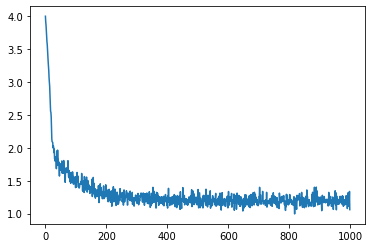

In [27]:
print('Loss changes')
plt.plot(history)
plt.show()

## More serious: char-level machine translation

Let's try to transliterate these names from English to Russian. So we need 2 models: encoder and decoder.

In [272]:
class Encoder(nn.Module):
    def __init__(self, num_tokens=num_tokens_en, emb_size=16, rnn_num_units=64):
        super().__init__()
        
        self.hid_dim = rnn_num_units
        self.emb = nn.Embedding(num_tokens, emb_size)
        self.rnn = nn.RNN(emb_size, rnn_num_units)
        self.hid_to_logits = nn.Linear(rnn_num_units, num_tokens)
        
    def forward(self, x):
        assert isinstance(x.data, torch.LongTensor)
        embedded = self.emb(x)
        h_seq, h_last = self.rnn(embedded)
        next_logits = self.hid_to_logits(h_seq)
        next_logp = F.log_softmax(next_logits, dim=-1)
        return next_logp, h_last

In [273]:
# check forward pass of encoder:

t = to_matrix(sample(names, 32), token_to_id_en, max_len=MAX_LENGTH)
t = torch.LongTensor(t)
print(t.shape) 

tencoder = Encoder()
tenc_res = tencoder.forward(t)
print(tenc_res[0].size(), tenc_res[1].size())

torch.Size([16, 32])
torch.Size([16, 32, 55]) torch.Size([1, 32, 64])


In [274]:
class Decoder(nn.Module):
    def __init__(self, num_tokens=num_tokens_ru, emb_size=16, rnn_num_units=64):
        super().__init__()
        
        self.hid_dim = rnn_num_units
        self.output_dim = num_tokens_ru
        
        self.emb = nn.Embedding(num_tokens, emb_size)
        self.rnn = nn.RNN(emb_size, rnn_num_units)
        self.hid_to_logits = nn.Linear(rnn_num_units, num_tokens)
        
    def forward(self, x, enc_last_state):
        assert isinstance(x.data, torch.LongTensor)
        h_seq, h_last = self.rnn(self.emb(x), enc_last_state)
        next_logits = self.hid_to_logits(h_seq)
        next_logp = F.log_softmax(next_logits, dim=-1)
        return next_logp, h_last

In [275]:
# check forward pass of encoder

t = to_matrix(sample(names_ru, 32), token_to_id_ru, max_len=MAX_LENGTH)
t = torch.LongTensor(t)
print(t.shape) 

tdecoder = Decoder()
tdec_res = tdecoder.forward(t, tenc_res[1])
print(tdec_res[0].size(), tdec_res[1].size())

del t, tencoder, tenc_res, tdecoder, tdec_res

torch.Size([16, 32])
torch.Size([16, 32, 54]) torch.Size([1, 32, 64])


In [154]:
class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder, device):
        super().__init__()
        
        self.encoder = encoder
        self.decoder = decoder
        self.device = device
        
        assert encoder.hid_dim == decoder.hid_dim, \
            "Hidden dimensions of encoder and decoder must be equal!"
        assert encoder.n_layers == decoder.n_layers, \
            "Encoder and decoder must have equal number of layers!"
        
    def forward(self, src, trg, teacher_forcing_ratio = 0.5):
        
        #src = [src sent len, batch size]
        #trg = [trg sent len, batch size]
        #teacher_forcing_ratio is probability to use teacher forcing
        #e.g. if teacher_forcing_ratio is 0.75 we use ground-truth inputs 75% of the time
        
        # Again, now batch is the first dimention instead of zero
        batch_size = trg.shape[1]
        max_len = trg.shape[0]
        trg_vocab_size = self.decoder.output_dim
        
        #tensor to store decoder outputs
        outputs = torch.zeros(
            max_len, batch_size, trg_vocab_size).to(self.device)
        
        #last hidden state of the encoder is used as the initial hidden state of the decoder
        hidden, cell = self.encoder(src)
        
        #first input to the decoder is the <sos> tokens
        input = trg[0,:]
        
        for t in range(1, max_len):
            
            output, hidden, cell = self.decoder(input, hidden, cell)
            outputs[t] = output
            teacher_force = random.random() < teacher_forcing_ratio
            # get token number with highest score for every 128 rows by columns
            top1 = output.max(1)[1]
            input = (trg[t] if teacher_force else top1)
        
        return outputs